In [3]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.cm as cm
import matplotlib.colors as mcol
pd.set_option('display.max_rows', 1000)

api_key = "cb3651d0"

In [4]:
#Reading in csv and previewing data
movie_data_df = pd.read_csv("imdb (1000 movies) in june 2022.csv")
movie_data_df.head()

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,12A,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,15,195 min,"Biography, Drama, History",9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


In [5]:
#renaming columns
clean_df = movie_data_df.rename(columns={
    "ranking of movie\r\n":"IMDB Rank",
    "movie name\r\n":"Movie Name",
    "certificate":"Rating",
    "runtime":"Runtime (Minutes)",
    "genre":"Genre",
    "RATING":"IMDB Score",
    "metascore":"Metascore",
    "DETAIL ABOUT MOVIE\n":"Details",
    "DIRECTOR\r\n":"Director",
    "ACTOR 1\n":"Actor 1",
    "ACTOR 2\n": "Actor 2",
    "ACTOR 3":"Actor 3",
    "ACTOR 4":"Actor 4",
    "votes":"IMDB Votes",
    "GROSS COLLECTION\r\n":"BoxOffice (Millions)"
})


#cleaning up columns and setting data types
#dropping null values
clean_df=clean_df.dropna()

# #cleaning year - removing "-" and setting to int

clean_df['Year'] = clean_df['Year'].str.extract(pat='(\d+)', expand=False)
clean_df["Year"]=clean_df["Year"].astype("int")

# #cleaning runtime and setting as int
clean_df["Runtime (Minutes)"]=clean_df["Runtime (Minutes)"].str.split(" ").str[0]
clean_df["Runtime (Minutes)"]=clean_df["Runtime (Minutes)"].astype("int")

# #clean up Genre to only get the first genre
clean_df["Main Genre"]=clean_df["Genre"].str.split(",").str[0]
clean_df["Sub Genre"]=clean_df["Genre"].str.split(",").str[1]
clean_df = clean_df.drop(columns="Genre")


#setting IMDB Score as int
clean_df["IMDB Score"]=clean_df["IMDB Score"].astype("float")

# #cleaning box office. Removing "$" and "M" and setting to float
clean_df["BoxOffice (Millions)"]=clean_df["BoxOffice (Millions)"].str.split("M").str[0]
clean_df["BoxOffice (Millions)"]=clean_df["BoxOffice (Millions)"].str.split("$").str[1]
clean_df["BoxOffice (Millions)"]=clean_df["BoxOffice (Millions)"].astype("float")

#Cleaning up IMDB votes and setting as int
clean_df["IMDB Votes"]=clean_df["IMDB Votes"].str.replace(",","")
clean_df["IMDB Votes"]=clean_df["IMDB Votes"].astype("int")


#standardize movie ratings
clean_df["Rating"]=clean_df["Rating"].replace("A","G")
clean_df["Rating"]=clean_df["Rating"].replace("U","G")
clean_df["Rating"]=clean_df["Rating"].replace("AA","PG")
clean_df["Rating"]=clean_df["Rating"].replace("12","PG")
clean_df["Rating"]=clean_df["Rating"].replace("15","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("12A","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("UA","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("18","R")
clean_df["Rating"]=clean_df["Rating"].replace("X","NC17")




#resetting index and displaying
clean_df=clean_df.reset_index()
clean_df=clean_df.drop(columns="index")
clean_df.head()







,IMDB Rank,Movie Name,Year,Rating,Runtime (Minutes),IMDB Score,Metascore,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,IMDB Votes,BoxOffice (Millions),Main Genre,Sub Genre
0,1,The Shawshank Redemption,1994,PG-13,142,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2603314,28.34,Drama,NaN
1,2,The Godfather,1972,NC17,175,9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1798731,134.97,Crime,Drama
2,3,The Dark Knight,2008,PG-13,152,9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2574810,534.86,Action,Crime
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1787701,377.85,Action,Adventure
4,5,Schindler's List,1993,PG-13,195,9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1323776,96.90,Biography,Drama


In [6]:
#creating a new column to store award info
clean_df["Awards"]=""
clean_df

,IMDB Rank,Movie Name,Year,Rating,Runtime (Minutes),IMDB Score,Metascore,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,IMDB Votes,BoxOffice (Millions),Main Genre,Sub Genre,Awards
0,1,The Shawshank Redemption,1994,PG-13,142,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2603314,28.34,Drama,NaN,
1,2,The Godfather,1972,NC17,175,9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1798731,134.97,Crime,Drama,
2,3,The Dark Knight,2008,PG-13,152,9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2574810,534.86,Action,Crime,
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1787701,377.85,Action,Adventure,
4,5,Schindler's List,1993,PG-13,195,9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1323776,96.90,Biography,Drama,
5,6,The Godfather Part II,1974,NC17,202,9.0,90.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1239027,57.30,Crime,Drama,
6,7,12 Angry Men,1957,G,96,9.0,96.0,The jury in a New York City murder trial is fr...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,769113,4.36,Crime,Drama,
7,9,Pulp Fiction,1994,R,154,8.9,94.0,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1995346,107.93,Crime,Drama,
8,10,Inception,2010,PG-13,148,8.8,74.0,A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2284252,292.58,Action,Adventure,
9,11,The Lord of the Rings: The Two Towers,2002,PG-13,179,8.8,87.0,While Frodo and Sam edge closer to Mordor with...,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1614489,342.55,Action,Adventure,


In [7]:
#search OMDB API for award info and put result in our new column

# for index, row in clean_df.iterrows():
#     try:
#         params = {
#         "apikey": api_key,
#         "t": row["Movie Name"]}
    
#         url = "http://www.omdbapi.com"
#         res = requests.get(url,params=params).json()
#         clean_df.loc[index,"Awards"]=res["Awards"]
#     except: 
#         pass
    

In [8]:
clean_df["Awards"]


0      
1      
2      
3      
4      
5      
6      
7      
8      
9      
10     
11     
12     
13     
14     
15     
16     
17     
18     
19     
20     
21     
22     
23     
24     
25     
26     
27     
28     
29     
30     
31     
32     
33     
34     
35     
36     
37     
38     
39     
40     
41     
42     
43     
44     
45     
46     
47     
48     
49     
50     
51     
52     
53     
54     
55     
56     
57     
58     
59     
60     
61     
62     
63     
64     
65     
66     
67     
68     
69     
70     
71     
72     
73     
74     
75     
76     
77     
78     
79     
80     
81     
82     
83     
84     
85     
86     
87     
88     
89     
90     
91     
92     
93     
94     
95     
96     
97     
98     
99     
100    
101    
102    
103    
104    
105    
106    
107    
108    
109    
110    
111    
112    
113    
114    
115    
116    
117    
118    
119    
120    
121    
122    
123    
124    


In [9]:
#put clean dataframe into csv
clean_df.to_csv("Refined_Data.csv",index=False)

In [10]:
#read clean csv to perform data analysis
refined_df=pd.read_csv("Refined_Data.csv")


In [11]:
clean_df["Rating"]=clean_df["Rating"].replace("U","G")
clean_df["Rating"]=clean_df["Rating"].replace("AA","PG")
clean_df["Rating"]=clean_df["Rating"].replace("12","PG")
clean_df["Rating"]=clean_df["Rating"].replace("15","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("12A","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("UA","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("18","R")
clean_df["Rating"]=clean_df["Rating"].replace("X","NC17")
clean_df

,IMDB Rank,Movie Name,Year,Rating,Runtime (Minutes),IMDB Score,Metascore,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,IMDB Votes,BoxOffice (Millions),Main Genre,Sub Genre,Awards
0,1,The Shawshank Redemption,1994,PG-13,142,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2603314,28.34,Drama,NaN,
1,2,The Godfather,1972,NC17,175,9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1798731,134.97,Crime,Drama,
2,3,The Dark Knight,2008,PG-13,152,9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2574810,534.86,Action,Crime,
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1787701,377.85,Action,Adventure,
4,5,Schindler's List,1993,PG-13,195,9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1323776,96.90,Biography,Drama,
5,6,The Godfather Part II,1974,NC17,202,9.0,90.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1239027,57.30,Crime,Drama,
6,7,12 Angry Men,1957,G,96,9.0,96.0,The jury in a New York City murder trial is fr...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,769113,4.36,Crime,Drama,
7,9,Pulp Fiction,1994,R,154,8.9,94.0,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1995346,107.93,Crime,Drama,
8,10,Inception,2010,PG-13,148,8.8,74.0,A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2284252,292.58,Action,Adventure,
9,11,The Lord of the Rings: The Two Towers,2002,PG-13,179,8.8,87.0,While Frodo and Sam edge closer to Mordor with...,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1614489,342.55,Action,Adventure,


# 1) AdrieneK IMdb Score vs Gross 
"Does the IMbd Score of a movie affect how much money it generates?"

In [ ]:
# rating_df = clean_df[clean_df['IMDB Score']=]

In [60]:
ak_df_mean = clean_df.groupby('Main Genre').mean()
ak_df_ = clean_df.groupby('Main Genre').mean()

/var/folders/23/l3b1_qsd0ydfx9g3yyv96wrr0000gn/T/ipykernel_19898/4132730638.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ak_df_mean = clean_df.groupby('Main Genre').mean()
/var/folders/23/l3b1_qsd0ydfx9g3yyv96wrr0000gn/T/ipykernel_19898/4132730638.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ak_df_ = clean_df.groupby('Main Genre').mean()


In [61]:
ak_df_mean

,Year,Runtime (Minutes),IMDB Score,Metascore,IMDB Votes,BoxOffice (Millions)
Main Genre,,,,,,
Action,2000.263158,128.473684,7.951880,74.338346,610258.368421,163.267068
Adventure,1988.775510,135.102041,7.969388,79.122449,453367.367347,107.517959
Animation,2002.833333,99.590909,7.921212,81.242424,353532.893939,136.756364
Biography,1999.642857,134.285714,7.938571,76.400000,352917.642857,64.086429
Comedy,1990.532710,111.271028,7.873832,78.018692,256276.953271,39.586355
Crime,1992.301205,128.397590,8.007229,77.771084,435541.096386,39.472289
Drama,1992.703883,127.645631,7.948544,79.543689,279052.771845,39.436019
Family,1971.000000,100.000000,7.800000,67.000000,198006.000000,4.000000
Fantasy,1998.000000,100.000000,7.600000,66.000000,198706.000000,14.380000


In [62]:
ak_df_mean=ak_df_mean.reset_index()

In [63]:
ak_df_mean

,Main Genre,Year,Runtime (Minutes),IMDB Score,Metascore,IMDB Votes,BoxOffice (Millions)
0,Action,2000.263158,128.473684,7.951880,74.338346,610258.368421,163.267068
1,Adventure,1988.775510,135.102041,7.969388,79.122449,453367.367347,107.517959
2,Animation,2002.833333,99.590909,7.921212,81.242424,353532.893939,136.756364
3,Biography,1999.642857,134.285714,7.938571,76.400000,352917.642857,64.086429
4,Comedy,1990.532710,111.271028,7.873832,78.018692,256276.953271,39.586355
5,Crime,1992.301205,128.397590,8.007229,77.771084,435541.096386,39.472289
6,Drama,1992.703883,127.645631,7.948544,79.543689,279052.771845,39.436019
7,Family,1971.000000,100.000000,7.800000,67.000000,198006.000000,4.000000
8,Fantasy,1998.000000,100.000000,7.600000,66.000000,198706.000000,14.380000
9,Film-Noir,1949.000000,104.000000,8.100000,97.000000,170010.000000,0.450000


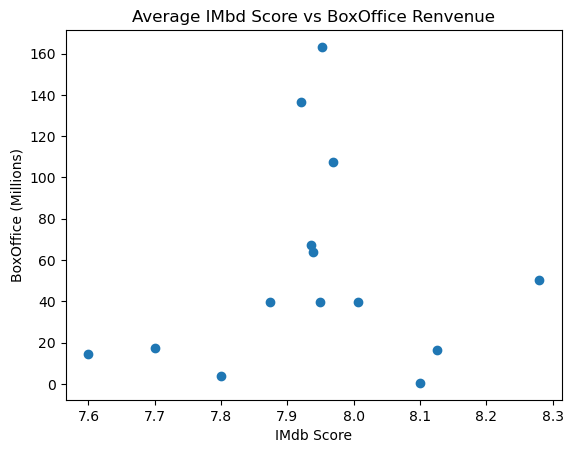

In [195]:
x_axis1 = ak_df_mean['IMDB Score']
y_axis1 = ak_df_mean['BoxOffice (Millions)']



plt.xlabel('IMdb Score')
plt.ylabel('BoxOffice (Millions)')
plt.title('Average IMbd Score vs BoxOffice Renvenue')

plt.scatter(x_axis1, y_axis1)
plt.show()

# 2) AdrieneK year vs box office "does the year of the movie release, affect the amount of money a movie makes"


In [200]:
rating_df_mean = clean_df.groupby('Rating').mean()



/var/folders/23/l3b1_qsd0ydfx9g3yyv96wrr0000gn/T/ipykernel_19898/2442561034.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_df_mean = clean_df.groupby('Rating').mean()


In [206]:
rating_df_mean = rating_df_mean.sort_values(by = 'BoxOffice (Millions)',ascending = False)
rating_df_mean=rating_df_mean.reset_index()

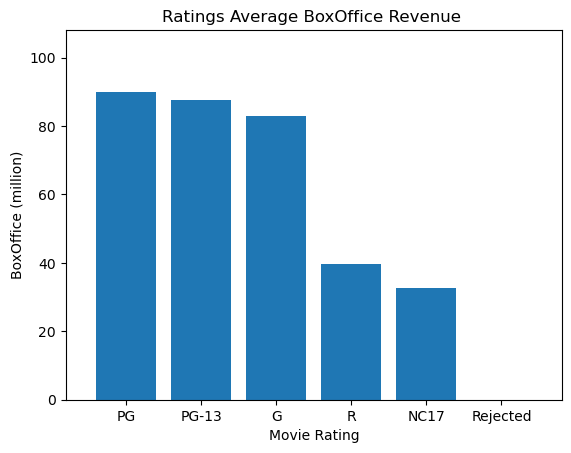

In [207]:
x_axis1 = rating_df_mean ['Rating']
y_axis1 = rating_df_mean ['BoxOffice (Millions)']
labels = clean_df['Movie Name']
plt.bar(x_axis1, y_axis1)
plt.margins(0.07,0.2)
plt.xlabel('Movie Rating')
plt.ylabel('BoxOffice (million)')
plt.title('Ratings Average BoxOffice Revenue ')
#sort high to lowest

plt.savefig('Graphs/Ratings_Revenue.png')
plt.show()

# 3) Number of times a genre appears on IMDB top 1000

In [185]:
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ranking of movie
   1000 non-null   object 
 1   movie name
         1000 non-null   object 
 2   Year                 1000 non-null   object 
 3   certificate          995 non-null    object 
 4   runtime              1000 non-null   object 
 5   genre                1000 non-null   object 
 6   RATING               1000 non-null   float64
 7   metascore            837 non-null    float64
 8   DETAIL ABOUT MOVIE
  1000 non-null   object 
 9   DIRECTOR
           1000 non-null   object 
 10  ACTOR 1
             1000 non-null   object 
 11  ACTOR 2
             1000 non-null   object 
 12  ACTOR 3              1000 non-null   object 
 13  ACTOR 4              1000 non-null   object 
 14  votes                1000 non-null   object 
 15  GROSS COLLECTION
   820 non-null    object

In [175]:
app_df = movie_data_df.rename(columns={
    "ranking of movie\r\n":"IMDB Rank",
    "movie name\r\n":"Movie Name",
    "certificate":"Rating",
    "runtime":"Runtime (Minutes)",
    "genre":"Genre",
    "RATING":"IMDB Score",
    "metascore":"Metascore",
    "DETAIL ABOUT MOVIE\n":"Details",
    "DIRECTOR\r\n":"Director",
    "ACTOR 1\n":"Actor 1",
    "ACTOR 2\n": "Actor 2",
    "ACTOR 3":"Actor 3",
    "ACTOR 4":"Actor 4",
    "votes":"IMDB Votes",
    "GROSS COLLECTION\r\n":"BoxOffice (Millions)"
})

In [176]:
# #clean up Genre to only get the first genre
app_df["Main Genre"]=app_df["Genre"].str.split(",").str[0]
app_df["Sub Genre"]=app_df["Genre"].str.split(",").str[1]
app_df = app_df.drop(columns="Genre")


In [177]:
num_app= app_df['Main Genre'].value_counts()
num_app

Drama        285
Action       182
Comedy       156
Crime        112
Biography     87
Animation     83
Adventure     63
Horror        13
Mystery        9
Western        4
Film-Noir      2
Fantasy        2
Family         1
Thriller       1
Name: Main Genre, dtype: int64

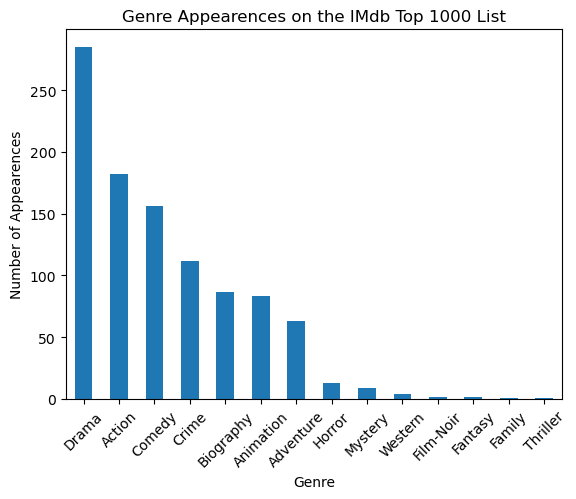

In [184]:
num_app.plot(kind='bar')

plt.title('Genre Appearences on the IMdb Top 1000 List')
plt.xlabel('Genre')
plt.ylabel('Number of Appearences')
plt.xticks(rotation = 45)

plt.savefig('Graphs/Genre_Appearences.png')
plt.show()

# 4) Top 5 Rated Actors

In [136]:
Actor1_df= clean_df.groupby('Actor 1').mean()['IMDB Score']

/var/folders/23/l3b1_qsd0ydfx9g3yyv96wrr0000gn/T/ipykernel_19898/493494598.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Actor1_df= clean_df.groupby('Actor 1').mean()['IMDB Score']


In [141]:
top5 = Actor1_df.sort_values(ascending = False).head(5)

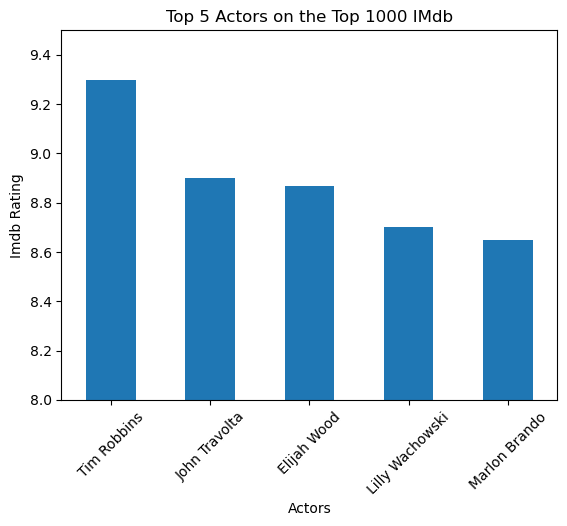

<Figure size 640x480 with 0 Axes>

In [183]:
top5.plot(kind = 'bar')
plt.ylim(8,9.5)

plt.title('Top 5 Actors on the Top 1000 IMdb')
plt.xlabel('Actors')
plt.ylabel('Imdb Rating')
plt.xticks(rotation = 45)

plt.show()

plt.savefig('Graphs/Top_5_Actors.png')